# Project 1: Sales Performance Analysis

## Project Overview
This project analyzes sales data across different regions to identify top-performing and underperforming regions. 
The goal is to clean and analyze the dataset, visualize revenue performance, and provide actionable business recommendations.

## Tools Used
- Python (Pandas, Matplotlib)
- Jupyter Notebook

## Key Skills Demonstrated
- Data cleaning and handling missing values
- Aggregation and analysis using groupby
- Data visualization
- Business insights and recommendations
- Preparing portfolio-ready project and CV bullets

## 1. Introduction

The dataset contains regional sales data with revenue figures for different regions. 
The objective is to understand which regions perform best and worst, 
identify any significant revenue gaps, and provide business recommendations based on the analysis.

## 2. Data Loading
Here we load the raw dataset into a Pandas Dataframe.
This step simulatesa real-world scenario where datasets may come in CSV or Excel format.

In [1]:
import pandas as pd

raw_data = {
    "region ": ["West", "East", "West", "North", "East", None, "South"],
    " revenue": [1700, 2500, None, 850, 1200, 600, 400]
}

df_raw = pd.DataFrame(raw_data)
df_raw

,region,revenue
0,West,1700.0
1,East,2500.0
2,West,NaN
3,North,850.0
4,East,1200.0
5,None,600.0
6,South,400.0


## 3. Data Cleaning

The raw dataset may have:
- Missing values
- Extra spaces in column names
- Unstandardized column names

Cleaning steps:
1. Standardize column names
2. Handle missing values by dropping or imputing
3. Verify cleaned data for accuracy

### Step 3a: Standardize column names
We remove extra spaces and capitalize column names for consistency and easier use in analysis.

In [2]:
df = df_raw.copy()

df.columns = df.columns.str.strip().str.capitalize()
df

,Region,Revenue
0,West,1700.0
1,East,2500.0
2,West,NaN
3,North,850.0
4,East,1200.0
5,None,600.0
6,South,400.0


### Step 3b: Check formissing values
We first check the dataset for missing values in each column to understand what needs cleaning.

In [3]:
df.isna()

,Region,Revenue
0,False,False
1,False,False
2,False,True
3,False,False
4,False,False
5,True,False
6,False,False


In [4]:
df.isna().sum()

Region     1
Revenue    1
dtype: int64

### Step 3c: Handle missing values
We remove rows with missing values to ensure the analysis is accurate.
In a real world project, other methods like imputations could also be used depending on the context.

In [5]:
df_clean = df.dropna()
df_clean

,Region,Revenue
0,West,1700.0
1,East,2500.0
3,North,850.0
4,East,1200.0
6,South,400.0


## 4. Data Analysis

We perform aggregation to calculate total revenue per region using groupby.
We also explore additional metrics like mean revenue per region if needed.

### Step 4a: Aggregate revenue by region
We group the cleaned dataset by Region and sum the Revenue column to calculate total revenue per region. 
This helps identify which regions are top-performing and which are underperforming.

In [6]:
regional_sales_clean = (
    df_clean
    .groupby("Region")["Revenue"]
    .sum()
    .sort_values(ascending=False)
)

regional_sales_clean

Region
East     3700.0
West     1700.0
North     850.0
South     400.0
Name: Revenue, dtype: float64

### Step 4b: Calculate mean revenue per region
We calculate the average revenue per region to get additional insight into typical revenue values. 
This is useful to understand consistency across regions, not just total revenue.

In [7]:
mean_revenue = df_clean.groupby("Region")["Revenue"].mean()
mean_revenue

Region
East     1850.0
North     850.0
South     400.0
West     1700.0
Name: Revenue, dtype: float64

## Data Cleaning Decisions
Missing values in the Region and Revenue columns were removed to ensure accurate aggregation and avoid misleading results in the analysis.

## 5. Data Visualization
Bar Chart of Revenue

### Step 5a: Visualize total revenue by region
We create a bar chart to visually compare the total revenue across regions. 
Visualizations help in quickly identifying trends and gaps that may not be obvious in tables.

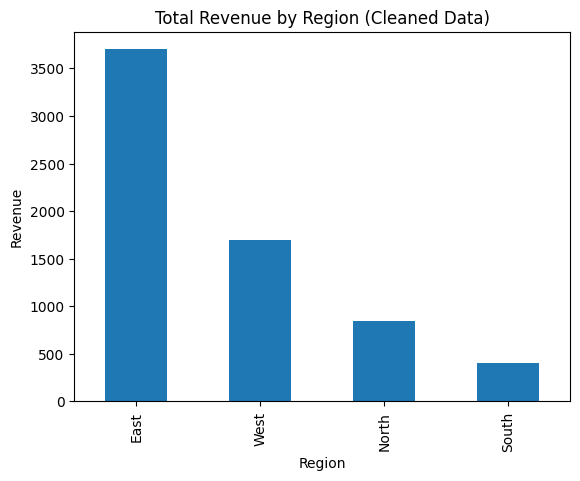

In [8]:
import matplotlib.pyplot as plt
regional_sales_clean.plot(kind="bar")
plt.title("Total Revenue by Region (Cleaned Data)")
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.show()

## Visualization Insight

The bar chart shows that the East region out performed the other Regions in total revenue, while the south region recorded the lowest revenue. There is a significant sales gap between the East and the West(second highest performing region), suggesting that more effective sales or marketing strategies may have been implemented in the East compared to other regions.

### Step 5b: Visualize mean revenue by region
We create a bar chart to visualize the average revenue per region for deeper insight into performance consistency.

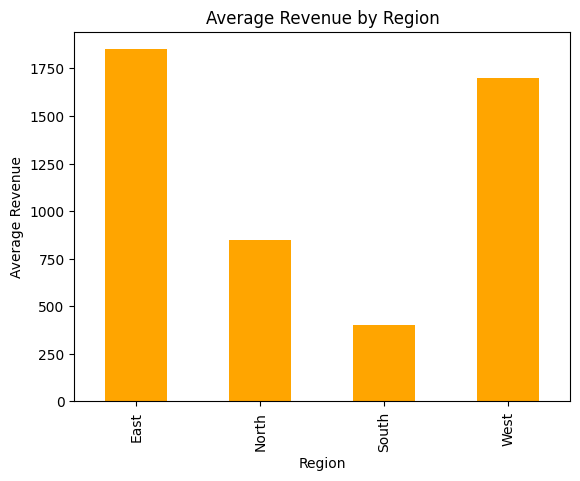

In [9]:
mean_revenue.plot(kind="bar", color="orange")
plt.title("Average Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Average Revenue")
plt.show()

## 6. Business Insights & Recommendations


## Insights

### Step 6a: Insights from analysis
- The East region generates the highest total revenue.
- The South region generates the lowest total revenue.
- There is a significant revenue gap between East and South, indicating potential underperformance in the South.

## Recommendations

### Step 6b: Business Recommendations
- Investigate the strategies used in the East region and see if similar approaches can be applied to underperforming regions.
- Focus on improving marketing or operational efficiency in the South to reduce revenue gaps.
- Consider additional analysis to identify other factors impacting regional performance.

## 7. Conclusion

This project demonstrates key data analytics skills:
- Cleaning and preparing raw data
- Aggregating and analyzing data
- Visualizing results for clarity
- Providing actionable business recommendations
- Creating a portfolio-ready project.